In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import cv2
import os
from PIL import Image
import pickle as pkl
import pydot
import graphviz
#from skimage.io import imread

#from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

from keras.utils.vis_utils import plot_model
from keras.models import model_from_json

plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [54]:
img = load_img('dataset/test_set/cats/cat.4001.jpg')
print('Original data type:', type(img))

img_array = img_to_array(img)
print('Image array data type:', type(img_array))
print('Image array shape:', img_array.shape)

img_array

Original data type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Image array data type: <class 'numpy.ndarray'>
Image array shape: (415, 498, 3)


array([[[ 12.,  14.,   9.],
        [  3.,   0.,   0.],
        [ 22.,   5.,  15.],
        ...,
        [  3.,   0.,   0.],
        [  2.,   0.,   3.],
        [  1.,   1.,   3.]],

       [[  0.,   1.,   0.],
        [ 11.,   7.,   6.],
        [107.,  90.,  98.],
        ...,
        [ 88.,  83.,  87.],
        [  2.,   0.,   3.],
        [  1.,   1.,   3.]],

       [[ 11.,  12.,   6.],
        [ 16.,  11.,   8.],
        [116.,  99., 105.],
        ...,
        [ 65.,  60.,  64.],
        [  2.,   0.,   3.],
        [  1.,   1.,   3.]],

       ...,

       [[  0.,   6.,   6.],
        [  7.,  11.,  12.],
        [ 89.,  87.,  90.],
        ...,
        [ 50.,  52.,  49.],
        [  1.,   1.,   1.],
        [  1.,   1.,   3.]],

       [[  2.,  12.,  11.],
        [  0.,   3.,   2.],
        [ 10.,  11.,  13.],
        ...,
        [  0.,   2.,   0.],
        [  1.,   1.,   1.],
        [  1.,   1.,   3.]],

       [[  0.,   4.,   0.],
        [  0.,  11.,   7.],
        [  0.,  

In [76]:
# function to import images as ndarrays

labels = ['cats', 'dogs']
img_size = 100

def get_data(data_dir):
    data = [] 
    #count = 1
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
                #print('Image', count, 'processed')
                #count += 1
            except Exception as e:
                print(e)
    return np.array(data)

In [1]:
train = get_data('dataset/training_set')
test = get_data('dataset/test_set')

In [73]:
train.shape

(8000, 2)

In [74]:
test.shape

(2000, 2)

In [79]:
# preprocess data

x_train = []
y_train = []
x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

x_test.reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

In [80]:
x_train.shape

(8000, 100, 100, 3)

In [81]:
y_train.shape

(8000,)

In [82]:
pkl.dump(x_train, open('x_train.pkl', 'wb'))
pkl.dump(x_test, open('x_test.pkl', 'wb'))
pkl.dump(y_train, open('y_train.pkl', 'wb'))
pkl.dump(y_test, open('y_test.pkl', 'wb'))

In [33]:
x_train = pkl.load(open('x_train.pkl', 'rb'))
x_test = pkl.load(open('x_test.pkl', 'rb'))
y_train = pkl.load(open('y_train.pkl', 'rb'))
y_test = pkl.load(open('y_test.pkl', 'rb'))

In [7]:
def show_item(data, row):
    plt.imshow(data[row, 0])
    print('Image label:', data[row, 1])
    if data[row, 1] == 0:
        print('This is a cat')
    else:
        print('This is a dog')

Image label: 0
This is a cat


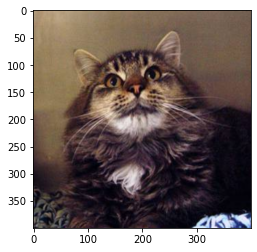

In [8]:
show_item(train, 333)

Image label: 1
This is a dog


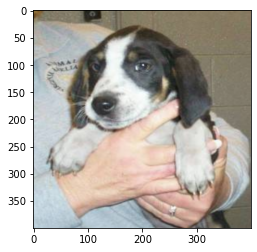

In [9]:
show_item(train,  4001)

Image label: 0
This is a cat


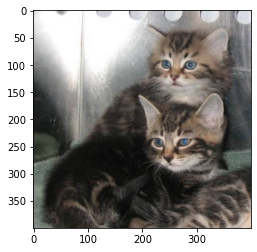

In [10]:
show_item(test, 250)

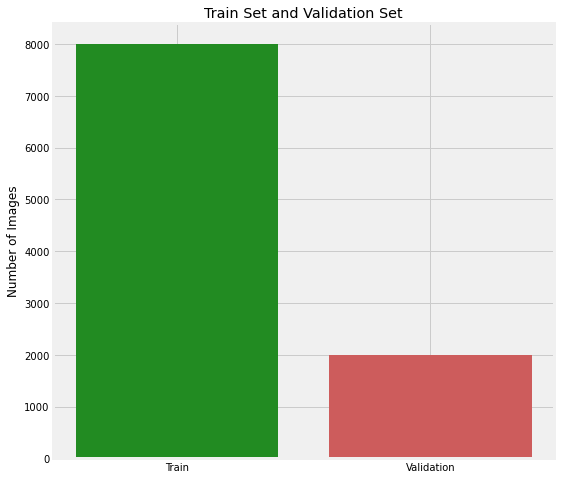

In [39]:
fig = plt.figure(figsize=(8,8))

plt.bar(['Train', 'Validation'], [x_train.shape[0], x_test.shape[0]], color=['forestgreen','indianred'])
plt.title('Train Set and Validation Set')
plt.ylabel('Number of Images')
plt.savefig('Train and Validation set bar plot.png')
plt.show()

In [34]:
num_classes = 2

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [87]:
y_train[2]

array([1., 0.], dtype=float32)

In [88]:
x_train[4]

array([[[0.20784314, 0.19215686, 0.02745098],
        [0.22352941, 0.18039216, 0.07058824],
        [0.23529412, 0.17647059, 0.04705882],
        ...,
        [0.07843137, 0.04313725, 0.        ],
        [0.10196078, 0.08627451, 0.04705882],
        [0.09803922, 0.07843137, 0.05490196]],

       [[0.20392157, 0.18431373, 0.04313725],
        [0.2       , 0.14901961, 0.05490196],
        [0.24313725, 0.18823529, 0.05490196],
        ...,
        [0.80784314, 0.8       , 0.74901961],
        [0.50980392, 0.48627451, 0.42745098],
        [0.3254902 , 0.2745098 , 0.21176471]],

       [[0.19607843, 0.17254902, 0.05882353],
        [0.20392157, 0.15686275, 0.0745098 ],
        [0.23137255, 0.17647059, 0.03921569],
        ...,
        [0.03921569, 0.05098039, 0.00392157],
        [0.15294118, 0.15686275, 0.10196078],
        [0.1372549 , 0.10980392, 0.07058824]],

       ...,

       [[0.20784314, 0.64705882, 0.41568627],
        [0.2       , 0.64705882, 0.41176471],
        [0.19215686, 0

In [90]:
x_train[0].shape

(100, 100, 3)

In [7]:
models = ['Model 1', 'Model 2', 'Model 3']
accuracy_train = []
accuracy_val = []
loss_train = []
loss_val = []

In [91]:
# Model 1, shallow neural network

model_1 = Sequential()

model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 32)        25632     
_________________________________________________________________
activation_1 (Activation)    (None, 23, 23, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3872)             

In [134]:
plot_model(model_1, to_file='model_1_plot.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [168]:
batch_size = 32

opt = keras.optimizers.Adam(lr=0.01)

model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/15
250/250 [==============================] - 37s 147ms/step - loss: 0.6936 - accuracy: 0.4985 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/15
250/250 [==============================] - 36s 143ms/step - loss: 0.6935 - accuracy: 0.4988 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/15
250/250 [==============================] - 36s 143ms/step - loss: 0.6934 - accuracy: 0.4983 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/15
250/250 [==============================] - 35s 141ms/step - loss: 0.6934 - accuracy: 0.5052 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 5/15
250/250 [==============================] - 34s 135ms/step - loss: 0.6938 - accuracy: 0.4950 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 6/15
250/250 [==============================] - 34s 137ms/step - loss: 0.6933 - accuracy: 0.5098 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 7/15
250/250 [==============================] - 34s 137ms/step - loss: 0.6934 - accuracy: 0.5073 - val_loss: 0.6932 - val_ac

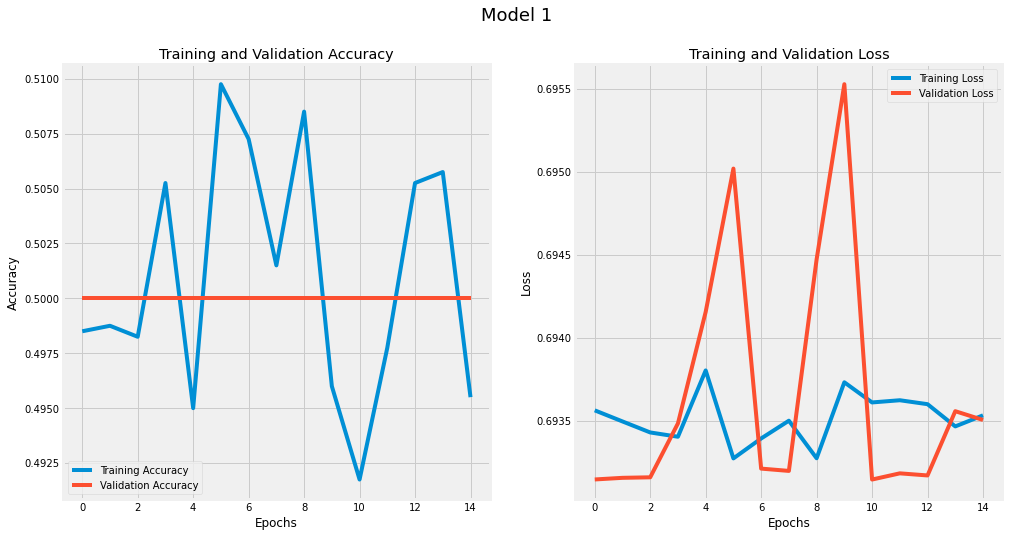

In [199]:
acc_1 = history_1.history['accuracy']
val_acc_1 = history_1.history['val_accuracy']
loss_1 = history_1.history['loss']
val_loss_1 = history_1.history['val_loss']

epochs_range = range(15)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

ax1.plot(epochs_range, acc_1, label='Training Accuracy')
ax1.plot(epochs_range, val_acc_1, label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend(loc='lower left')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')

ax2.plot(epochs_range, loss_1, label='Training Loss')
ax2.plot(epochs_range, val_loss_1, label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend(loc='upper right')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')

fig.suptitle('Model 1', fontsize=18)

plt.savefig('Model 1 Accuracy and Loss.png')

plt.show()

In [210]:
accuracy_train.append(acc_1[-1])
accuracy_val.append(val_acc_1[-1])
loss_train.append(loss_1[-1])
loss_val.append(val_loss_1[-1])

In [169]:
# save model and weights to disk

model_1_json = model_1.to_json()
with open("model_1.json", "w") as json_file:
    json_file.write(model_1_json)

model_1.save_weights("model_1.h5")

In [3]:
# load model and weights to disk

json_file = open('model_1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model_1 = model_from_json(loaded_model_json)
loaded_model_1.load_weights("model_1.h5")

In [4]:
# evaluate loaded model

loaded_model_1.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
score = loaded_model_1.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model_1.metrics_names[1], score[1]*100))

accuracy: 50.00%


In [10]:
loss_1, accuracy_1 = loaded_model_1.evaluate(x_test, y_test, verbose=0)
#loss.append(round(loss_1, 3))
#accuracy.append(round(accuracy_1, 3))

In [11]:
print('Metrics for Model 1')
print('Loss:', loss_1)
print('Accuracy:', accuracy_1)

Metrics for Model 1
Loss: 0.6935044527053833
Accuracy: 0.5


In [14]:
plot_model(loaded_model_1, to_file='model_1_plot.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [16]:
# Model 2, deeper neural network with kernel size 3x3

model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

In [144]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
activation_28 (Activation)   (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 98, 98, 32)        9248      
_________________________________________________________________
activation_29 (Activation)   (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 49, 49, 64)       

In [17]:
batch_size = 32

opt = keras.optimizers.Adam(lr=0.01)

model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/15
250/250 [==============================] - 221s 882ms/step - loss: 2.4792 - accuracy: 0.4918 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/15
250/250 [==============================] - 218s 872ms/step - loss: 0.6934 - accuracy: 0.4975 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 3/15
250/250 [==============================] - 216s 863ms/step - loss: 0.6936 - accuracy: 0.5061 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/15
250/250 [==============================] - 215s 860ms/step - loss: 0.6937 - accuracy: 0.5082 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 5/15
250/250 [==============================] - 213s 850ms/step - loss: 0.6938 - accuracy: 0.4920 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 6/15
250/250 [==============================] - 210s 842ms/step - loss: 0.6936 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/15
250/250 [==============================] - 211s 846ms/step - loss: 0.6936 - accuracy: 0.4985 - val_loss: 0.6933 -

In [4]:
acc_2 = history_2.history['accuracy']
val_acc_2 = history_2.history['val_accuracy']
loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

epochs_range = range(15)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

ax1.plot(epochs_range, acc_2, label='Training Accuracy')
ax1.plot(epochs_range, val_acc_2, label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend(loc='lower left')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.grid(False)

ax2.plot(epochs_range, loss_2, label='Training Loss')
ax2.plot(epochs_range, val_loss_2, label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend(loc='upper right')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid(False)

fig.suptitle('Model 2', fontsize=18)

plt.savefig('Model 2 Accuracy and Loss.png')

plt.show()


In [211]:
accuracy_train.append(acc_2[-1])
accuracy_val.append(val_acc_2[-1])
loss_train.append(loss_2[-1])
loss_val.append(val_loss_2[-1])

In [20]:
# save model and weights to disk

model_2_json = model_2.to_json()
with open("model_2.json", "w") as json_file:
    json_file.write(model_2_json)

model_2.save_weights("model_2.h5")

In [5]:
# load model and weights to disk

json_file = open('model_2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model_2 = model_from_json(loaded_model_json)
loaded_model_2.load_weights("model_2.h5")

In [6]:
# evaluate loaded model

loaded_model_2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
score = loaded_model_2.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model_2.metrics_names[1], score[1]*100))

accuracy: 50.00%


In [193]:
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test, verbose=0)
#loss.append(round(loss_2, 3))
#accuracy.append(round(accuracy_2, 3))

In [122]:
print('Metrics for Model 2')
print('Loss:', loss_2)
print('Accuracy:', accuracy_2)

Model 2
Loss: 0.6935372352600098
Accuracy: 0.5


In [127]:
# Model 3

model_3 = Sequential()

model_3.add(Conv2D(32, (5, 5), padding='same',
                 input_shape=x_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (5, 5)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (5, 5), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (5, 5)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

In [128]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 100, 100, 32)      2432      
_________________________________________________________________
activation_22 (Activation)   (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 96, 96, 32)        25632     
_________________________________________________________________
activation_23 (Activation)   (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 48, 48, 64)       

In [148]:
batch_size = 32

opt = keras.optimizers.Adam(lr=0.0001)

model_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history_3 = model_3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/15
250/250 [==============================] - 694s 3s/step - loss: 0.0716 - accuracy: 0.9736 - val_loss: 0.6447 - val_accuracy: 0.8010
Epoch 2/15
250/250 [==============================] - 673s 3s/step - loss: 0.0508 - accuracy: 0.9837 - val_loss: 0.7331 - val_accuracy: 0.7965
Epoch 3/15
250/250 [==============================] - 673s 3s/step - loss: 0.0460 - accuracy: 0.9861 - val_loss: 0.7721 - val_accuracy: 0.8080
Epoch 4/15
250/250 [==============================] - 671s 3s/step - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.7889 - val_accuracy: 0.7990
Epoch 5/15
250/250 [==============================] - 670s 3s/step - loss: 0.0315 - accuracy: 0.9901 - val_loss: 0.8635 - val_accuracy: 0.7995
Epoch 6/15
250/250 [==============================] - 671s 3s/step - loss: 0.0325 - accuracy: 0.9899 - val_loss: 0.9274 - val_accuracy: 0.7915
Epoch 7/15
250/250 [==============================] - 670s 3s/step - loss: 0.0272 - accuracy: 0.9918 - val_loss: 0.8323 - val_accuracy: 0.8075

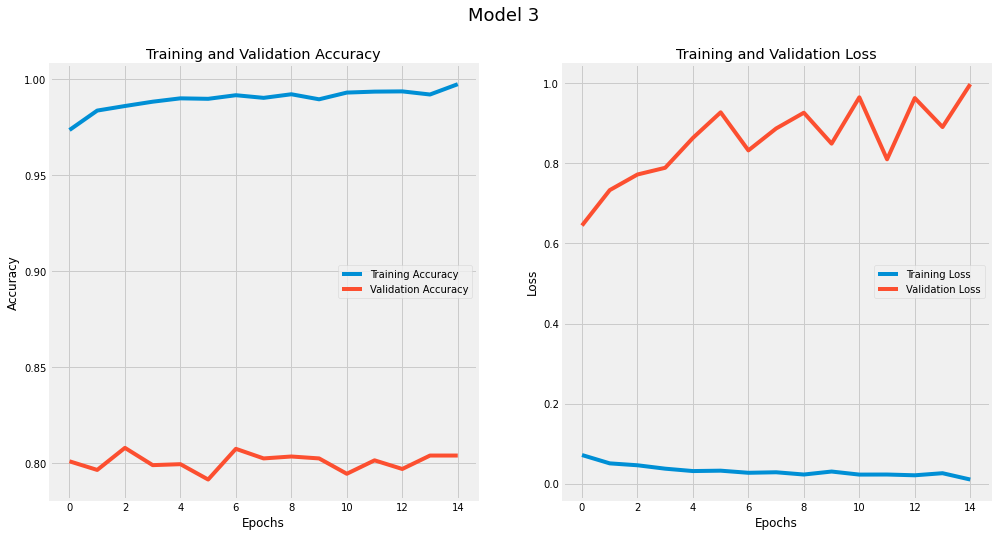

In [201]:
acc_3 = history_3.history['accuracy']
val_acc_3 = history_3.history['val_accuracy']
loss_3 = history_3.history['loss']
val_loss_3 = history_3.history['val_loss']

epochs_range = range(15)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

ax1.plot(epochs_range, acc_3, label='Training Accuracy')
ax1.plot(epochs_range, val_acc_3, label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend(loc='center right')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')

ax2.plot(epochs_range, loss_3, label='Training Loss')
ax2.plot(epochs_range, val_loss_3, label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend(loc='center right')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')

fig.suptitle('Model 3', fontsize=18)

plt.savefig('Model 3 Accuracy and Loss.png')

plt.show()

In [213]:
accuracy_train.append(acc_3[-1])
accuracy_val.append(val_acc_3[-1])
loss_train.append(loss_3[-1])
loss_val.append(val_loss_3[-1])

In [162]:
# save model and weights to disk

model_3_json = model_3.to_json()
with open("model_3.json", "w") as json_file:
    json_file.write(model_3_json)

model_3.save_weights("model_3.h5")

In [7]:
# load model and weights to disk

json_file = open('model_3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model_3 = model_from_json(loaded_model_json)
loaded_model_3.load_weights("model_3.h5")

In [8]:
# evaluate loaded model

loaded_model_3.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
score = loaded_model_3.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model_3.metrics_names[1], score[1]*100))

accuracy: 80.40%


In [133]:
loss_3, accuracy_3 = model_3.evaluate(x_test, y_test, verbose=0)
#loss.append(round(loss_3, 3))
#accuracy.append(round(accuracy_3, 3))

In [136]:
print('Metrics for Model 3')
print('Loss:', loss_3)
print('Accuracy:', accuracy_3)

Metrics for Model 3
Loss: 0.6422051191329956
Accuracy: 0.8015000224113464


In [226]:
# create DataFrame of metrics

data = {'Model': models, 'Train Accuracy': accuracy_train, 'Validation Accuracy': accuracy_val,
       'Train Loss': loss_train, 'Validation Loss': loss_val}

df = pd.DataFrame(data, columns = ['Model', 'Train Accuracy', 'Validation Accuracy',
                                  'Train Loss', 'Validation Loss'])

df.set_index('Model', inplace=True)
df.T

df

,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
Model,,,,
Model 1,0.4955,0.500,0.693533,0.693505
Model 2,0.4960,0.500,0.693719,0.693182
Model 3,0.9975,0.804,0.010391,0.997631


In [220]:
import dataframe_image as dfi

dfi.export(df, 'Model Metrics Table.png')

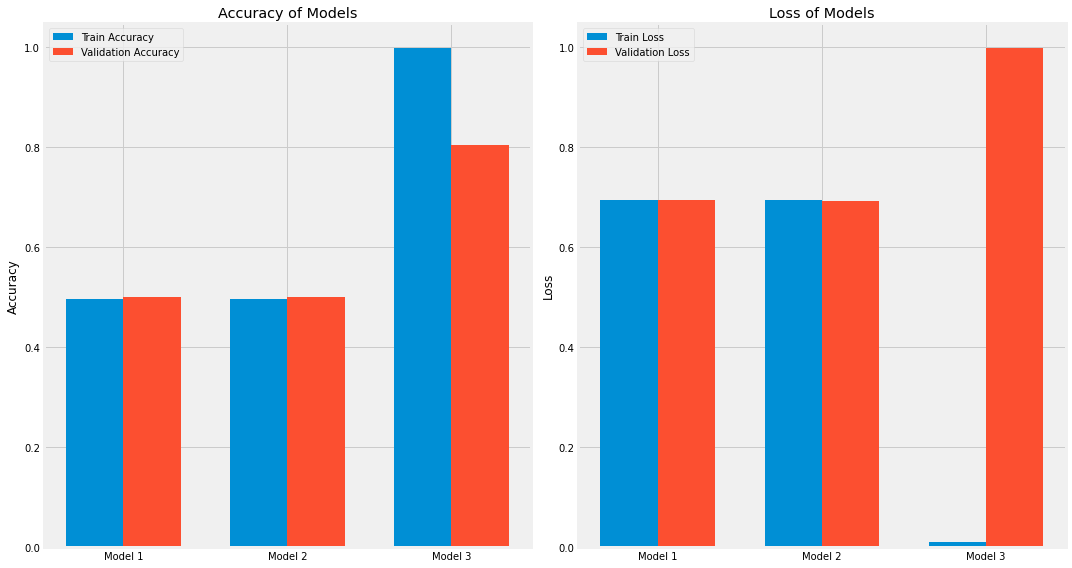

In [29]:
model_list = ['Model 1', 'Model 2', 'Model 3']
train_acc_list = [0.4955, 0.4960, 0.9975]
val_acc_list = [0.500, 0.500, 0.804]
train_loss_list = [0.693533, 0.693719, 0.010391]
val_loss_list = [0.693505, 0.693182, 0.997631]

x = np.arange(len(model_list))
width = 0.35

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

ax1.bar(x - width/2, train_acc_list, label='Train Accuracy', width=width)
ax1.bar(x + width/2, val_acc_list, label='Validation Accuracy', width=width)
ax1.set_title('Accuracy of Models')
ax1.set_ylabel('Accuracy')
ax1.set_xticks(x)
ax1.set_xticklabels(model_list)
ax1.legend()

ax2.bar(x - width/2, train_loss_list, label='Train Loss', width=width)
ax2.bar(x + width/2, val_loss_list, label='Validation Loss', width=width)
ax2.set_title('Loss of Models')
ax2.set_ylabel('Loss')
ax2.set_xticks(x)
ax2.set_xticklabels(model_list)
ax2.legend()

fig.tight_layout()

plt.savefig('Accuracy Loss bar charts.png')

plt.show()


In [37]:
# Model 4

num_classes = 2

model_4 = Sequential()

model_4.add(Conv2D(32, (5, 5), padding='same',
                 input_shape=x_train.shape[1:]))
model_4.add(Activation('relu'))
model_4.add(Conv2D(32, (5, 5)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Conv2D(64, (5, 5), padding='same'))
model_4.add(Activation('relu'))
model_4.add(Conv2D(64, (5, 5)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Flatten())
model_4.add(Dense(512))
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes))
model_4.add(Activation('softmax'))

In [38]:
batch_size = 32

opt = keras.optimizers.Adam(lr=0.0001)

model_4.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history_4 = model_4.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=3,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/3
250/250 [==============================] - 464s 2s/step - loss: 0.6750 - accuracy: 0.5705 - val_loss: 0.6267 - val_accuracy: 0.6535
Epoch 2/3
250/250 [==============================] - 450s 2s/step - loss: 0.5953 - accuracy: 0.6896 - val_loss: 0.5781 - val_accuracy: 0.6880
Epoch 3/3
250/250 [==============================] - 471s 2s/step - loss: 0.5378 - accuracy: 0.7289 - val_loss: 0.5191 - val_accuracy: 0.7410


In [36]:
# save model and weights to disk

model_4_json = model_4.to_json()
with open("model_4.json", "w") as json_file:
    json_file.write(model_4_json)

model_4.save_weights("model_4.h5")

In [9]:
# load model and weights to disk

json_file = open('model_4.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model_4 = model_from_json(loaded_model_json)
loaded_model_4.load_weights("model_4.h5")

In [10]:
# evaluate loaded model

loaded_model_4.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
score = loaded_model_4.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model_4.metrics_names[1], score[1]*100))

accuracy: 71.30%


In [ ]:
#HEIGHT = 100
#WIDTH = 100

#def predict_class(file_name):
#    img_arr = cv2.imread(file_name)[...,::-1]
#    resized_arr = cv2.resize(img_arr, (HEIGHT, WIDTH))
    